# Proyecto

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/home/oscar-dev/Platzimaster/Week11/CursoFundamentosDeEstadisticaYAnalisisDeDatosConPython/scripts/6-caracterizar-informacion-analisis-exploratorio/1-proyecto-analisis-exploratorio'

In [3]:
path = '/home/oscar-dev/Platzimaster/Week11/CursoFundamentosDeEstadisticaYAnalisisDeDatosConPython/scripts/6-caracterizar-informacion-analisis-exploratorio/proyecto-titanic'

In [4]:
# os.mkdir(path)
os.chdir(path)

In [5]:
os.getcwd()

'/home/oscar-dev/Platzimaster/Week11/CursoFundamentosDeEstadisticaYAnalisisDeDatosConPython/scripts/6-caracterizar-informacion-analisis-exploratorio/proyecto-titanic'

In [6]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.isna().sum(axis = 0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
df = df.drop(['Cabin'], axis = 1)

In [9]:
df = df[df.Age.notna()]
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
vars_disc = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for i in vars_disc:
    print(df[i].value_counts())
    
# Se itera sobre estas variables para entender el contenido de cada una de ellas.

0    424
1    290
Name: Survived, dtype: int64
3    355
1    186
2    173
Name: Pclass, dtype: int64
male      453
female    261
Name: Sex, dtype: int64
0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64
0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    554
C    130
Q     28
Name: Embarked, dtype: int64


In [11]:
vars_cat = ['Pclass', 'Sex', 'Embarked']
# One hot encoding es un proceso en el que la variable categorica se expresa como un 1 o 0 dentro de las categorías que tiene cada variable
#def one_hot():
for i in vars_cat:
    categorias = df[i].value_counts().index

    print(categorias)
    for j in categorias:
        name = 'is-'+str(i)+'-'+str(j)
        print(name)
        df[name] = np.where(df[i] == j, 1, 0)

    df = df.drop([i], axis= 1)

Int64Index([3, 1, 2], dtype='int64')
is-Pclass-3
is-Pclass-1
is-Pclass-2
Index(['male', 'female'], dtype='object')
is-Sex-male
is-Sex-female
Index(['S', 'C', 'Q'], dtype='object')
is-Embarked-S
is-Embarked-C
is-Embarked-Q


{'whiskers': [<matplotlib.lines.Line2D at 0x7f91026af690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91026a1910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91026a18d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9102641b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91026afc50>],
 'means': []}

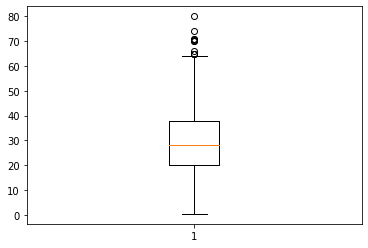

In [12]:
# Outliers - Tarea
y = df['Age']
fig, axis = plt.subplots()
axis.boxplot(x = y)

In [13]:
# df['Age'].describe()
# Primer outlier, edad, personas mayores a 60 años.
df = df.drop(df[df['Age'] > 60].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91025ce090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91025d2790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91025ce050>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91025ced10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91025d9810>],
 'means': []}

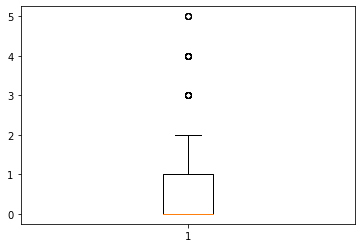

In [14]:
y = df['SibSp']
fig, axis = plt.subplots()
axis.boxplot(x = y)

In [15]:
df['SibSp'].describe()

count    692.000000
mean       0.524566
std        0.940011
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: SibSp, dtype: float64

In [16]:
df = df.drop(df[df['SibSp'] > 2].index)

count    657.000000
mean      33.566425
std       51.979076
min        0.000000
25%        8.050000
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

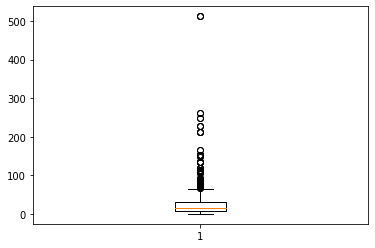

In [17]:
y = df['Fare']
fig, axis = plt.subplots()
axis.boxplot(x = y)
df['Fare'].describe()

In [18]:
df = df.drop(df[df['Fare'] > 50].index)

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'is-Pclass-3', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Sex-female', 'is-Embarked-S', 'is-Embarked-C', 'is-Embarked-Q'],
      dtype='object')

In [20]:
df['family_size'] = df['SibSp'] + df['Parch']

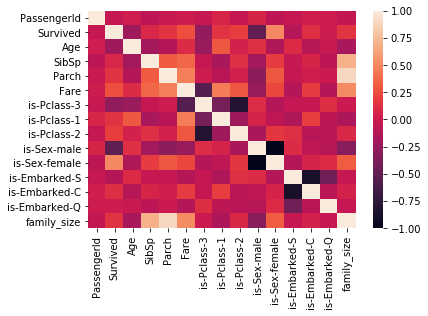

In [21]:
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)

In [22]:
df = df.drop(['is-Pclass-3', 'is-Sex-male', 'is-Embarked-C'], axis = 1)

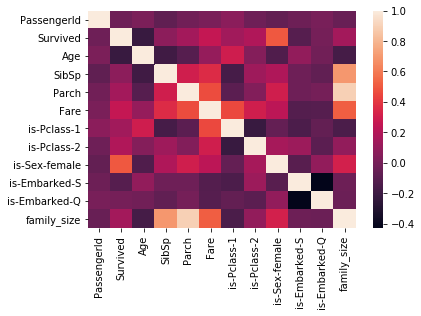

In [23]:
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)

In [24]:
df.to_csv(path+'/csv_procesado.csv')